In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
selected_columns = [
    'bant_submit', 'customer_country', 'business_unit', 'com_reg_ver_win_rate',
    'customer_idx', 'customer_type', 'enterprise', 'historical_existing_cnt',
    'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'customer_job',
    'lead_desc_length', 'inquiry_type', 'product_category', 'product_subcategory',
    'product_modelname', 'customer_country.1', 'customer_position',
    'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
    'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area', 'business_subarea',
    'lead_owner'
]

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_file_path = '/content/drive/MyDrive/LGdata/train.csv'

df = pd.read_csv(train_file_path)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Inquiry Type: (select id_needs)
Total: 1
Converted: 1
Conversion Ratio: 100.00%

Inquiry Type: aio
Total: 1
Converted: 1
Conversion Ratio: 100.00%

Inquiry Type: customer suggestions
Total: 12
Converted: 2
Conversion Ratio: 16.67%

Inquiry Type: digital platform
Total: 1
Converted: 0
Conversion Ratio: 0.00%

Inquiry Type: display product
Total: 1
Converted: 0
Conversion Ratio: 0.00%

Inquiry Type: display textbook and photos
Total: 1
Converted: 0
Conversion Ratio: 0.00%

Inquiry Type: educational equipments
Total: 1
Converted: 0
Conversion Ratio: 0.00%

Inquiry Type: estoy buscando para ecuador este producto lg magnit micro led, para un cliente de 138 pulgadas, con envió marítimo.
Total: 1
Converted: 0
Conversion Ratio: 0.00%

Inquiry Type: etc.
Total: 221
Converted: 2
Conversion Ratio: 0.90%

Inquiry Type: event inquiry
Total: 5
Converted: 0
Conversion Ratio: 0.00%

Inquiry Type: evento_sdelestero
Total: 1
Converted: 0
Conversion Ratio: 0.00%

Inquiry Type: first info and pricing
Tota

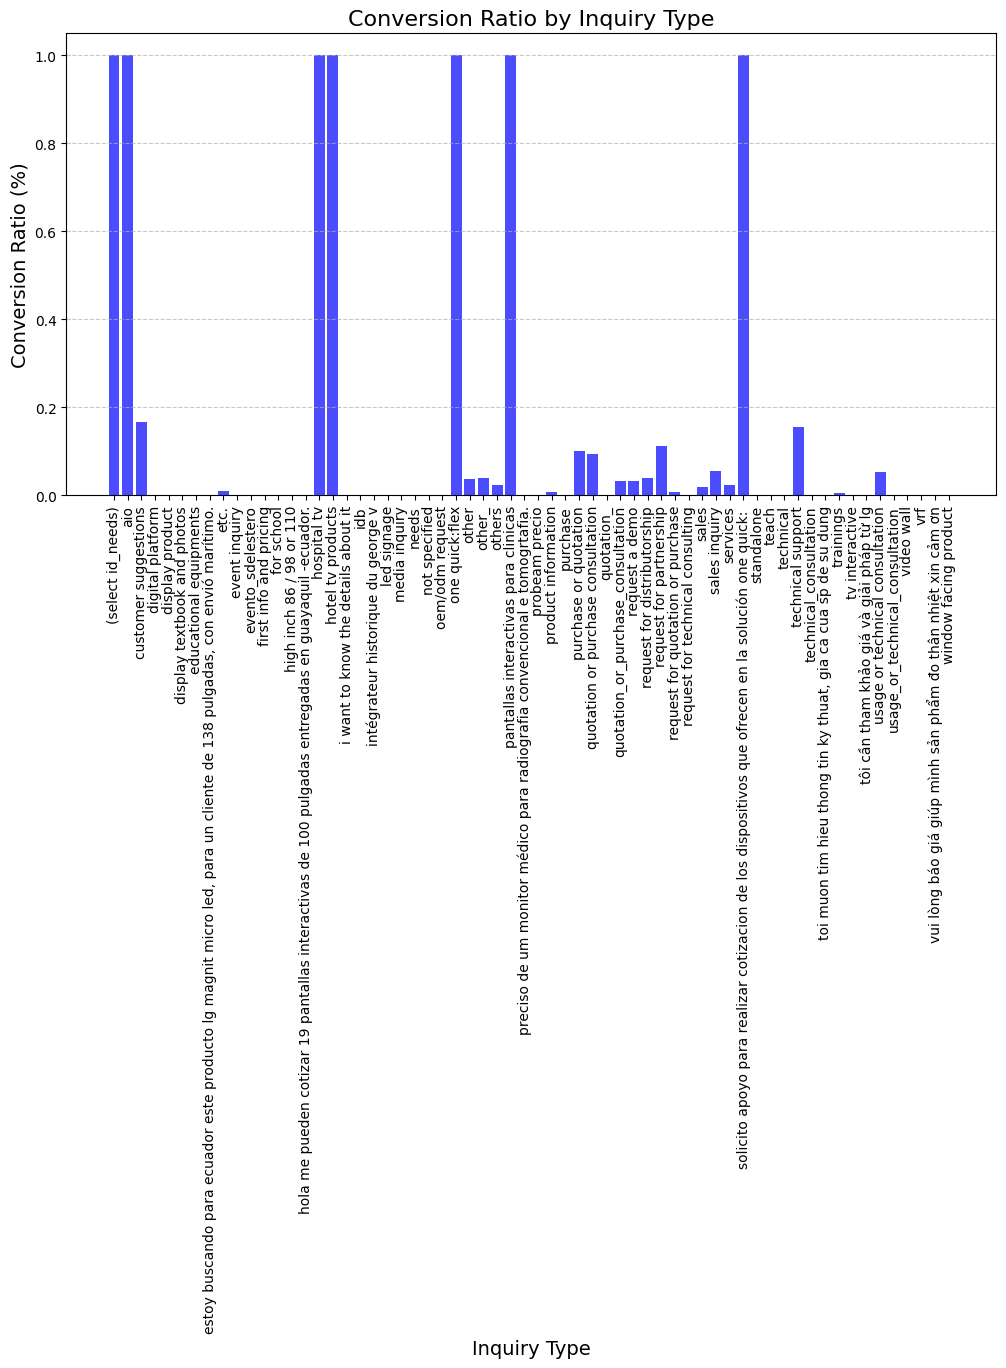

In [52]:
# Merging similar categories
df['inquiry_type'] = df['inquiry_type'].replace({
    'Quotation or purchase consultation': 'Quotation or Purchase Consultation',
    'Usage or technical consultation': 'Usage or Technical Consultation',
    'Technical Consultation': 'Usage or Technical Consultation'
})

# Re-analyze inquiry_type
df_inquiry_type = df.dropna(subset=['inquiry_type'])

converted_counts_inquiry_type = df_inquiry_type.groupby('inquiry_type')['is_converted'].sum().reset_index()
total_counts_inquiry_type = df_inquiry_type.groupby('inquiry_type')['is_converted'].count().reset_index()

ratio_df_inquiry_type = pd.merge(converted_counts_inquiry_type, total_counts_inquiry_type, on='inquiry_type', how='left')
ratio_df_inquiry_type['conversion_ratio'] = ratio_df_inquiry_type['is_converted_x'] / ratio_df_inquiry_type['is_converted_y']

for index, row in ratio_df_inquiry_type.iterrows():
    inquiry_type = row['inquiry_type']
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    print(f"Inquiry Type: {inquiry_type}\nTotal: {total}\nConverted: {converted}\nConversion Ratio: {ratio:.2f}%\n")

plt.figure(figsize=(12, 6))

bars = plt.bar(ratio_df_inquiry_type['inquiry_type'], ratio_df_inquiry_type['conversion_ratio'], color='blue', alpha=0.7)

plt.title('Conversion Ratio by Inquiry Type', fontsize=16)
plt.xlabel('Inquiry Type', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)

plt.xticks(rotation='vertical')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Inquiry Type: quotation or purchase consultation
Total: 42043
Converted: 3913
Conversion Ratio: 9.31%

Inquiry Type: sales inquiry
Total: 9981
Converted: 560
Conversion Ratio: 5.61%

Inquiry Type: usage or technical consultation
Total: 1609
Converted: 84
Conversion Ratio: 5.22%

Inquiry Type: product information
Total: 1237
Converted: 10
Conversion Ratio: 0.81%

Inquiry Type: other
Total: 951
Converted: 35
Conversion Ratio: 3.68%

Inquiry Type: trainings
Total: 434
Converted: 2
Conversion Ratio: 0.46%

Inquiry Type: services
Total: 415
Converted: 10
Conversion Ratio: 2.41%

Inquiry Type: request for partnership
Total: 297
Converted: 33
Conversion Ratio: 11.11%

Inquiry Type: request for quotation or purchase
Total: 230
Converted: 2
Conversion Ratio: 0.87%

Inquiry Type: etc.
Total: 221
Converted: 2
Conversion Ratio: 0.90%



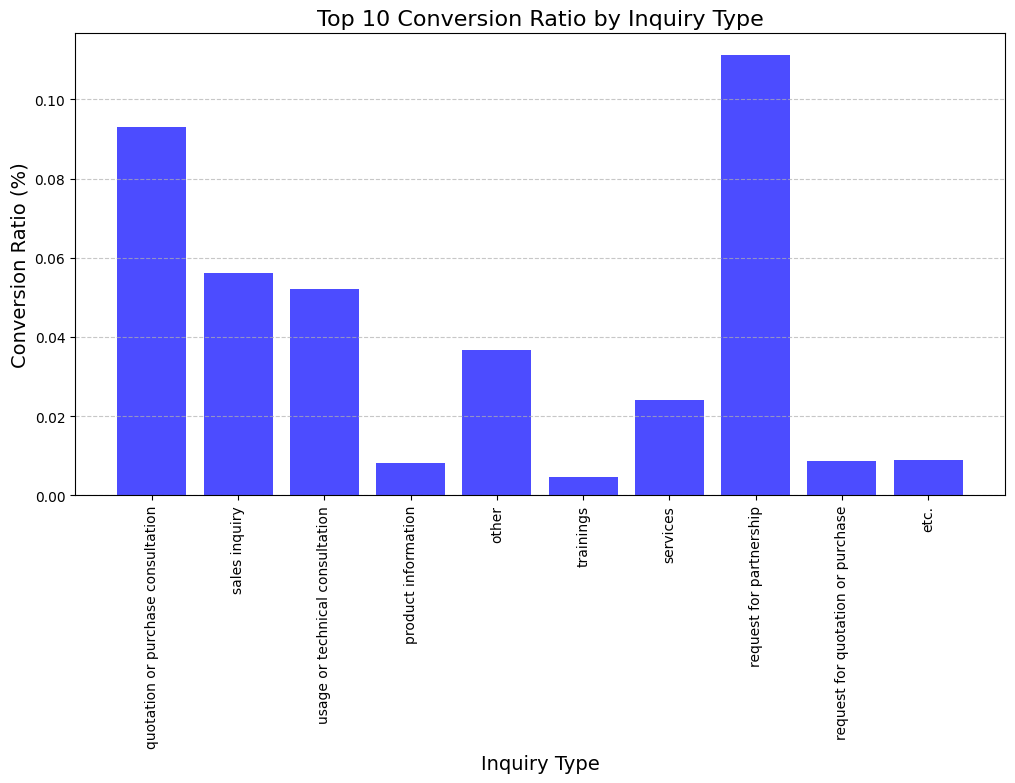

In [53]:
# Sorting by total counts in descending order
top_10_inquiry_types = ratio_df_inquiry_type.sort_values(by='is_converted_y', ascending=False).head(10)

# Displaying top 10 items
for index, row in top_10_inquiry_types.iterrows():
    inquiry_type = row['inquiry_type']
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    print(f"Inquiry Type: {inquiry_type}\nTotal: {total}\nConverted: {converted}\nConversion Ratio: {ratio:.2f}%\n")

plt.figure(figsize=(12, 6))

bars = plt.bar(top_10_inquiry_types['inquiry_type'], top_10_inquiry_types['conversion_ratio'], color='blue', alpha=0.7)

plt.title('Top 10 Conversion Ratio by Inquiry Type', fontsize=16)
plt.xlabel('Inquiry Type', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)

plt.xticks(rotation='vertical')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
